This script compile the results and generate plots/figures to comprare CPGC with FM [1].

## References

[1] Tomás Feder and Rajeev Motwani. 1991. Clique partitions, graph compression and speeding-up algorithms. In Proceedings of the twenty-third annual ACM symposium on Theory of Computing (STOC '91). Association for Computing Machinery, New York, NY, USA, 123–133. [Link to paper](https://doi.org/10.1145/103418.103424).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
df = pd.read_csv("sequentialRandomizedCPGCResults_small_graphs.csv")
seq_df = pd.read_csv("fm_results.csv")

In [3]:
nodes = list(df['graphNodes'].unique())
density = list(df['density'].unique())
expNo = list(df['expNo'].unique())
delta = list(df['delta'].unique())

In [4]:
def shorten_number(number):
    if abs(number) >= 1e9:
        return r"{:.2f} B".format(number / 1e9)
    elif abs(number) >= 1e6:
        return r"{:.2f} M".format(number / 1e6)
    elif abs(number) >= 1e3:
        return r"{:.2f} K".format(number / 1e3)
    else:
        return str(int(number))

In [5]:
color = ['gainsboro', 'silver', 'darkgrey', 'grey', 'dimgrey']

In [6]:
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = [x for x in data if (x >= lower_bound and x <= upper_bound)]
    return filtered_data 

In [7]:
avgCompRatio = {}
seq_CompRatio = {}
e = 1
for n in nodes:
    for d in density:
        for de in delta:
            seq_CompRatio[(n,d,e,de)] = remove_outliers(seq_df[(seq_df['graphNodes'] == n) & (seq_df['density'] == d) & 
                              (seq_df['delta'] == de)].compressionRatio.tolist())
            avgCompRatio[(n,d,e,de)] = remove_outliers(df[(df['graphNodes'] == n) & (df['density'] == d)  & (df['delta'] == de)].compressionRatio.tolist())

32 [1.0, 1.46, 1.35, 1.3, 1.19, 1.13]
64 [1.52, 1.39, 1.33, 1.21, 1.16, 1.08]
128 [1.43, 1.34, 1.19, 1.16, 1.16, 1.22]


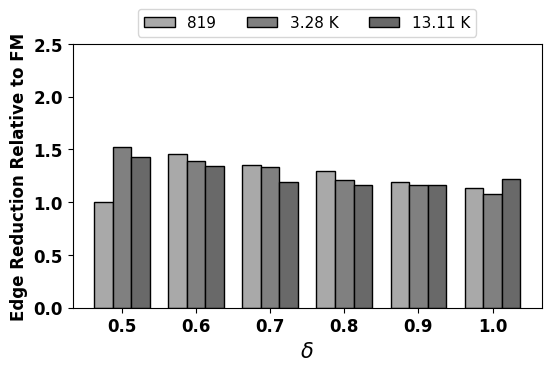

32 [1.61, 1.5, 1.41, 1.4, 1.29, 1.18]
64 [1.54, 1.41, 1.42, 1.29, 1.22, 1.12]
128 [1.45, 1.43, 1.27, 1.22, 1.14, 1.16]


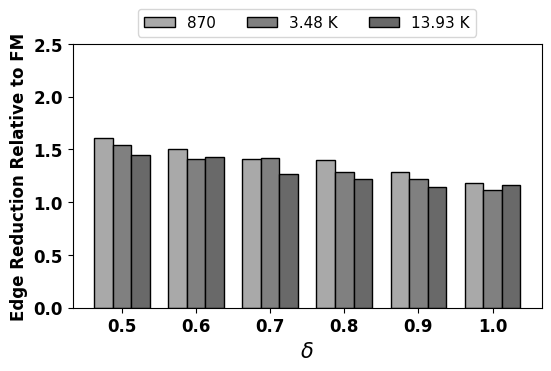

32 [1.63, 1.51, 1.56, 1.43, 1.33, 1.31]
64 [1.57, 1.69, 1.53, 1.41, 1.27, 1.18]
128 [1.75, 1.55, 1.41, 1.26, 1.18, 1.14]


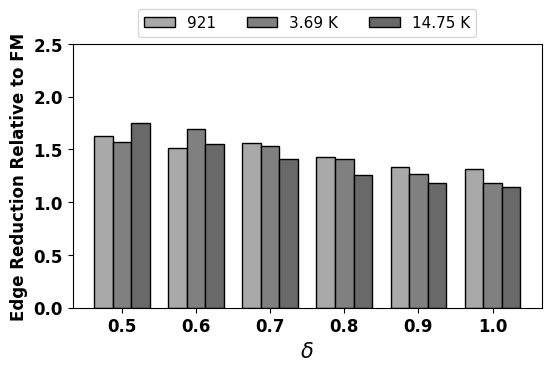

32 [1.69, 1.56, 1.74, 1.62, 1.69, 1.62]
64 [1.6, 1.87, 1.67, 1.7, 1.48, 1.34]
128 [1.93, 1.71, 1.73, 1.52, 1.35, 1.29]


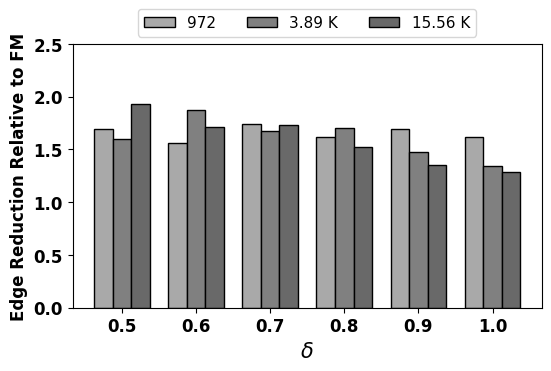

32 [1.69, 1.58, 1.86, 1.68, 2.03, 1.85]
64 [1.64, 2.0, 2.24, 2.0, 1.76, 1.62]
128 [2.08, 2.3, 2.03, 1.91, 1.85, 1.67]


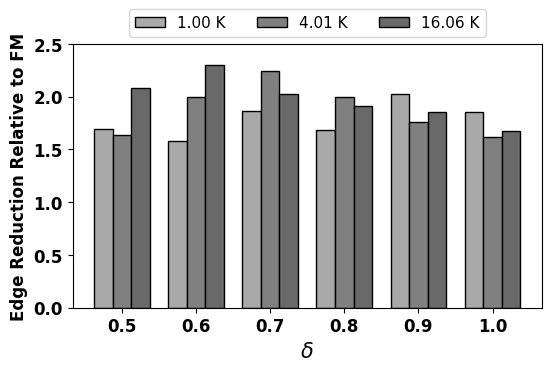

In [8]:
# we want to show that increasing delta increases the compression rate therefore we plot for fixed density and fixed cores
# x axis is delta and y axis is compression ratio for 3 different nodes

# for c in [16]:
plotData = {}
plotStd = {}
seq = {}
for d in [80, 85, 90, 95, 98]:
    e = 1
    plotData[d] = {}
    plotStd[d] = {}
    seq[d] = {}

    for n in nodes:
        plotData[d][n] = []
        plotStd[d][n] = []
        seq[d][n] = []
        for de in delta:
            plotData[d][n].append(round(np.mean(avgCompRatio[(n,d,e,de)])/np.mean(seq_CompRatio[(n,d,e,de)]), 2))
            plotStd[d][n].append(np.mean(avgCompRatio[(n,d,e,de)]))
            seq[d][n].append(np.mean(seq_CompRatio[(n,d,e,de)]))

    bar_width = 0.25  # Width of each bar
    x = np.arange(len(delta))  # X-axis values
    f, axes = plt.subplots(constrained_layout=True, figsize=[5.4, 3.6])
    i = 0

    for n in nodes:
#         power = edges_80[i]
        plt.bar(x + i * bar_width , plotData[d][n], width=bar_width, label= f'{shorten_number(n**2 * d/100)}', color = color[i+2], edgecolor = 'k') #, yerr=plotStd[n], error_kw=dict(elinewidth=5, capsize=5, capthick=2, ecolor = 'red'))
        i = i + 1
        print(n, plotData[d][n])

    fc = 12
    # Adding labels, title, and legend
    plt.xlabel('$\delta$', fontsize=fc +3, weight = 'bold')
    plt.ylabel('Edge Reduction Relative to FM', fontsize=fc  , weight = 'bold')
#         plt.title(f'For {d}% density and {c} cores', fontsize=11, weight = 'bold')
    plt.xticks(x + bar_width, delta, fontsize=fc, weight = 'bold')
    plt.yticks(fontsize=fc, weight = 'bold')
    plt.legend(ncol = 3, fontsize=fc-1, loc = 'upper center', bbox_to_anchor = (0.5, 1.16))
    plt.ylim(0,2.5)
    plt.savefig(f'plots/relative_compression_ratio_density_{d}.pdf', dpi=300)
    plt.show()

In [9]:
# for d in [80, 85, 90, 95, 98]:
#     for n in nodes:
#         print(d, n, (plotData[d][n]))
